In [1]:
import pandas as pd
import numpy as np

# 그래프 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 과학 라이브러리
from scipy import stats

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# e : 10의 지수승
print(1e-1)
print(3.14e+4)

0.1
31400.0


# 1. 아들키 평균 검정

In [3]:
df_heights = pd.read_csv('data/heights.csv')

In [4]:
# 아들키 평균
h_mean = df_heights['son'].mean()
h_mean

174.45753692820037

In [5]:
h_std = df_heights['son'].std()     # 표준편차
h_cnt = df_heights['son'].count()   # 관측치 수

In [6]:
# Q. 아들키 평균은 전국 20대 남성 평균키인 174와 통계적으로 다르다고 말할 수 있나?
# 귀무가설 : 아들키 평균은 174와 같다.(차이가 없다)
# 대립가설 : 아들키 평균은 174보다 크다.
# 유의 수준은 5%(0.05)

In [7]:
# (평균이 174인 분포에서 추출한) 랜덤 키 데이터 표본
np.random.normal(174, h_std, h_cnt)

array([176.4304133 , 182.06596495, 172.98366866, ..., 179.96443223,
       174.28728609, 165.45076483])

In [8]:
# 표본 평균
np.random.normal(174, h_std, h_cnt).mean()   

173.6806816617853

In [9]:
# 10,000번 표본 추출 후 평균 10,000개로 히스토그램 분포 그리기
fake_mean = []
for i in range(10000):
    fake_mean.append(np.random.normal(174, h_std, h_cnt).mean())
# fake_mean  # 10000개의 표본 평균들이 들어있는 리스트

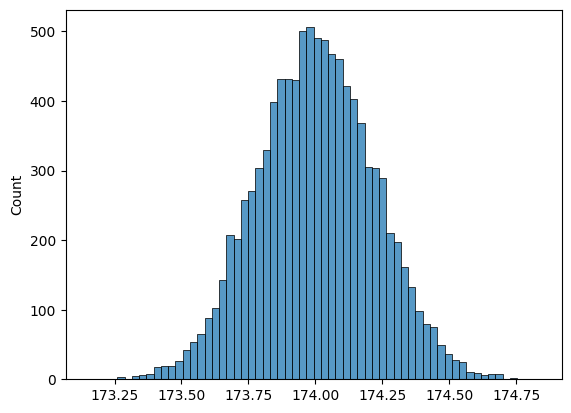

In [10]:
# 가짜 키 표본 평균 10000개의 히스토그램
sns.histplot(x=fake_mean);

In [11]:
# 대부분의 가짜 키 데이터의 평균들은 실제 아들키 평균(174.45)보다 작다.

In [12]:
h1 = np.sum(np.array(fake_mean) > h_mean )  # 100~300개 사이
h1

178

In [13]:
h1/10000  # 1~3% => (5% 기준으로) 굉장히 희박한 확률

0.0178

In [14]:
# 해석 : 가짜 평균 데이터(10000개) 중 실제 평균키 174.45 보다 큰 것이 1xx 밖에 없음.
# 결론 : 우리가 가진 아들키는 174보다 유의미하게 크다고 말할 수 있다.

# 2. 두 그룹 차이 검정(t-test와 비모수 검정)

In [15]:
# Q. 남자 독해점수와 여자 독해점수 차이 검정

In [16]:
# 귀무가설 : 두 그룹은 차이가 없다.
# 대립가설 : 두 그룹은 차이가 있다.
# 유의수준은 0.05

In [17]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head(3)

(1000, 8)


,sex,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [18]:
df_sp['sex'].value_counts()

female    518
male      482
Name: sex, dtype: int64

In [19]:
# 남녀 독해점수 데이터 분리
male_score = df_sp[df_sp['sex']=='male']['reading score']
female_score = df_sp[df_sp['sex']=='female']['reading score']

In [20]:
# 남녀 독해점수 평균 계산
print(np.mean(male_score))
print(np.mean(female_score))

65.47302904564316
72.60810810810811


In [21]:
# 데이터들의 정규성 검정(귀무가설 : 정규분포를 따른다)
stats.shapiro(male_score), stats.shapiro(female_score)

(ShapiroResult(statistic=0.9946241974830627, pvalue=0.08971262723207474),
 ShapiroResult(statistic=0.9854975342750549, pvalue=4.9607144319452345e-05))

In [22]:
# => 여자 독해점수는 정규분포를 따르지 않는다.

In [23]:
# (비모수 검정)윌콕슨 순위합 검정
stats.ranksums(male_score, female_score)

RanksumsResult(statistic=-7.816067379633199, pvalue=5.449920986376782e-15)

In [24]:
# 통계적 해석 : p-value < 0.05 => 대립가설 채택.
# 결론 : 남자 독해점수와 여자 독해점수 차이가 있다.

In [25]:
# (정규성 만족 가정)

In [26]:
# 등분산 검정(=> p-value > 0.05, 등분산 만족)
stats.bartlett(male_score, female_score)

BartlettResult(statistic=0.4947914902633937, pvalue=0.4817976802944669)

In [27]:
# 독립 표본 t-test 
stats.ttest_ind(male_score, female_score, equal_var=True)

Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)

In [28]:
# 통계적 해석 : p-value < 0.05 => 대립가설 채택.
# 결론 : 남자 독해점수와 여자 독해점수 차이가 있다.

#### [실습] 두 그룹의 평균 비교 및 검정

In [29]:
# 1. '남자 수학점수'와 '여자 수학점수' 데이터를 생성 후 각각 변수로 저장
# 2. 성별 평균 수학점수 계산
# 3. shapiro 정규성 검정 후 결과에 따라 두 그룹 차이 검정 수행 
# 4. 정규성 가정하고 독립 표본 t검정 수행

# 3. 분산분석(anova) : 세 그룹 이상 차이 검정

In [35]:
# Q. 보험료 데이터에서 지역이 4개가 있다. 지역 간 보험료(charges)는 차이가 있을까?

In [36]:
df_ins = pd.read_csv('data/insurance.csv')
df_ins.shape

(1338, 7)

In [37]:
# 지역 별 보험료 평균은? groupby
df_ins.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

### 3-1. scipy를 활용한 분산분석

In [38]:
# 데이터를 그룹별로 분할 후 f_oneway() 함수 활용

In [39]:
# 지역별 데이터 분할
g1 = df_ins[df_ins['region']=='southeast']['charges']
g2 = df_ins[df_ins['region']=='southwest']['charges']
g3 = df_ins[df_ins['region']=='northwest']['charges']
g4 = df_ins[df_ins['region']=='northeast']['charges']

In [40]:
# 정규성 검정(귀무가설 : 정규분포를 따른다.)
stats.shapiro(g1), stats.shapiro(g2), stats.shapiro(g3), stats.shapiro(g4)

(ShapiroResult(statistic=0.8242298364639282, pvalue=1.23268419436607e-19),
 ShapiroResult(statistic=0.7842952609062195, pvalue=2.023667803366432e-20),
 ShapiroResult(statistic=0.8128032684326172, pvalue=4.268387928586811e-19),
 ShapiroResult(statistic=0.8353428840637207, pvalue=6.552730011610829e-18))

In [ ]:
# p-value < 0.05  => 대립가설 채택(정규분포를 안 따른다.)
# 분산분석 대신, 비모수검정 kruskal을 사용해야 함

In [45]:
# kruskal 비모수 검정
stats.kruskal(g1, g2, g3, g4)

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

In [46]:
# 통계적 해석 : p-value < 0.05 => 대립가설 채택
# 결론 : 네 지역의 charges는 유의미한 차이가 있다고 말할 수 없다.

In [48]:
# (if 정규성, 등분산 가정한다면) f_oneway 함수로 anova 수행
stats.f_oneway(g1, g2, g3, g4)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

# 4. 독립성 검정(카이제곱 검정)

In [61]:
# Q. 성별(남, 녀) 흡연여부(YES, NO) 간 연관성이 있는지(독립인지)?

In [62]:
# 독립성 검정
# 귀무가설 : 두 변수는 서로 독립이다.
# 대립가설 : 두 변수는 서로 독립이 아니다(연관성이 있다.)

In [63]:
# 교차표
agg = pd.crosstab(df_ins['sex'], df_ins['smoker'])
agg

smoker,no,yes
sex,,
female,547,115
male,517,159


In [64]:
# 행백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index')

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


In [65]:
# 독립성검정(카이제곱검정)
stats.chi2_contingency(agg)

Chi2ContingencyResult(statistic=7.39291081459996, pvalue=0.006548143503580696, dof=1, expected_freq=array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))

In [66]:
# p-value(0.006) < 0.05 => 대립가설 채택.
# 결론 : 성별 흡연여부는 연관성을 보인다.

#### [실습] df_sp 데이터에서 인종별 부모교육수준이 연관성이 있을까?

In [67]:
# 1. 'race/ethnicity' 와 'parental level of education' 교차표 만들고 ct 변수에 저장
# 2. 독립성 검정

In [68]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head(1)

,sex,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
